<a href="https://colab.research.google.com/github/AnitaAmmann/Python/blob/main/Teil_3_zusammen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#31 - Reading and exploring data

<div align="center"> <h1>Reading and Exploring Data</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

*scikit-learn* is a python package that has a complete collection of tools and models for machine learning and data mining.

From pre-processing to predicting, *scikit-learn* offers a consistent work flow that makes it very easy to experiment new models.

In this example we use a data set created by Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu). It lists features of cars and their price. Suppose that we want to predict the price of a car.

In machine learning the following terminology is often used:

* "features" / "Independent variables" - The variables used to predict something, i.e., the columns in our Dataframe. We later also denote it with `X`.
* "target" - The variable we want to predict (also one of the columns of the Dataframe). We later also denote it with `y`.
* "observations" / "data points" / "items" - Each of the individual data points, i.e., the rows in the Dataframe.

# Reading Data from CSV

Let's load the dataset:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
car_prices=pd.read_csv("car_prices.csv")

In [ ]:
car_prices

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Exploration

In [ ]:
car_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


We have 204 observations of 25 features. The target feature is the 'price'.

We can see the data types of each column:

In [ ]:
car_prices.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

For this example we will keep only some of the numeric columns:

In [ ]:
features = car_prices[['length', 'width', 'height', 'engine-size',  'stroke', 'compression-ratio', 'horsepower', 'price']]
features = features.replace('?', '', regex=False) # replacen Fragezeichen mit leerem String
features = features.apply(pd.to_numeric, errors='coerce')
print(features.dtypes)

length               float64
width                float64
height               float64
engine-size            int64
stroke               float64
compression-ratio    float64
horsepower           float64
price                float64
dtype: object


In [ ]:
# Test, was das false bringt
featurestest = car_prices[['length', 'width', 'height', 'engine-size',  'stroke', 'compression-ratio', 'horsepower', 'price']]
featurestest = featurestest.replace('?', '') # replacen Fragezeichen mit leerem String
featurestest = featurestest.apply(pd.to_numeric, errors='coerce')
print(featurestest.dtypes)

length               float64
width                float64
height               float64
engine-size            int64
stroke               float64
compression-ratio    float64
horsepower           float64
price                float64
dtype: object


Let's take a look at the histograms of the features:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
#magic function that renders the figure in a notebook

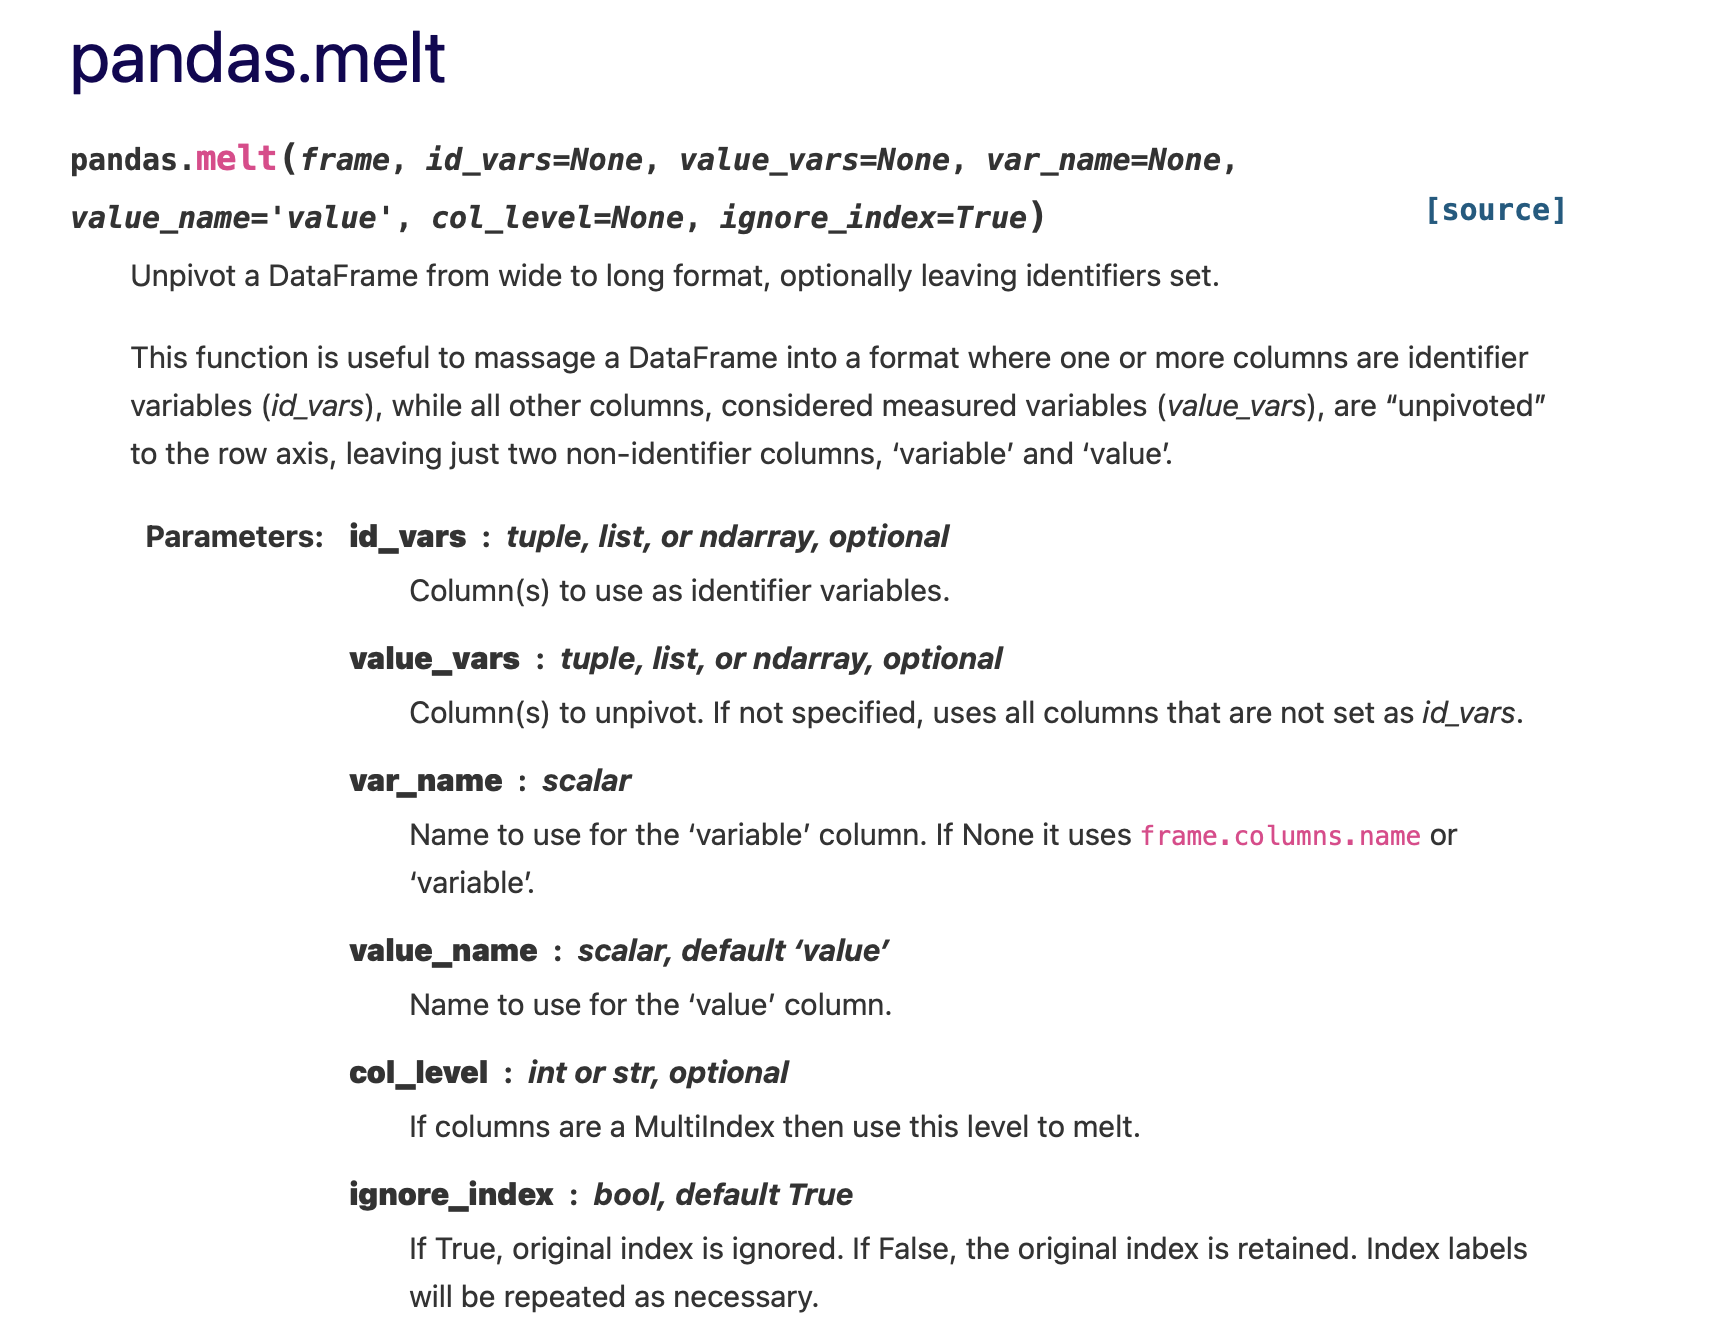

id_vars sind Spalten, die intakt bleiben sollen
Bsp:
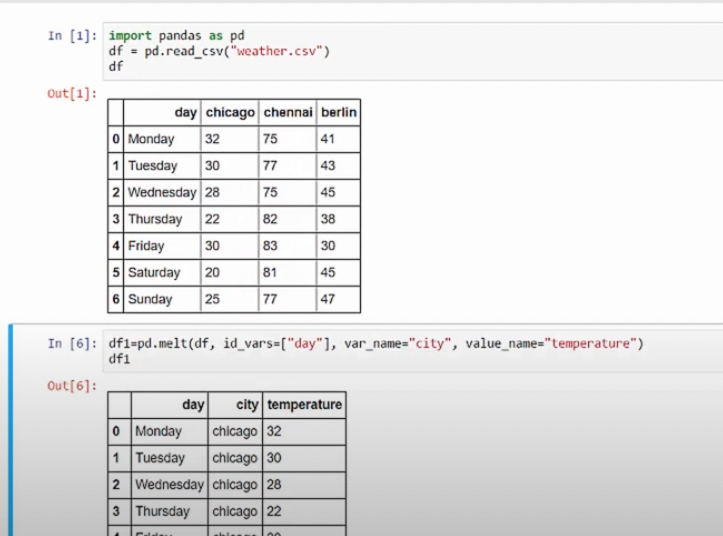

     variable    value
0      length    168.8
1      length    168.8
2      length    171.2
3      length    176.6
4      length    176.6
...       ...      ...
1635    price  16845.0
1636    price  19045.0
1637    price  21485.0
1638    price  22470.0
1639    price  22625.0

[1640 rows x 2 columns]


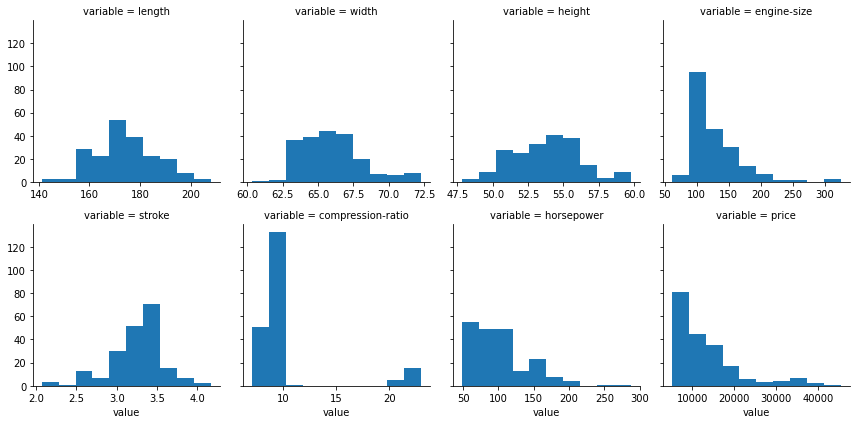

In [ ]:
# VISUALISATION - nicht in Klausur
long_feat = pd.melt(features, value_vars=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price']) 
print(long_feat)
fg = sns.FacetGrid(long_feat, col="variable", col_wrap=4, sharex=False)
fg = fg.map(plt.hist, "value" )

In [ ]:
long_feat_length=pd.melt(features,id_vars='width',value_vars='length')
print(long_feat_length)

     width variable  value
0     64.1   length  168.8
1     64.1   length  168.8
2     65.5   length  171.2
3     66.2   length  176.6
4     66.4   length  176.6
..     ...      ...    ...
200   68.9   length  188.8
201   68.8   length  188.8
202   68.9   length  188.8
203   68.9   length  188.8
204   68.9   length  188.8

[205 rows x 3 columns]


In [ ]:
long_feat_length.dtypes

width       float64
variable     object
value       float64
dtype: object

In [ ]:
features.sort_values(by='length',ascending=True).head(20)

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
18,141.1,60.3,53.2,61,3.03,9.5,48.0,5151.0
30,144.6,63.9,50.8,92,3.41,9.6,58.0,6479.0
31,144.6,63.9,50.8,92,3.41,9.2,76.0,6855.0
34,150.0,64.0,52.6,92,3.41,9.2,76.0,7129.0
33,150.0,64.0,52.6,92,3.41,9.2,76.0,6529.0
32,150.0,64.0,52.6,79,3.07,10.1,60.0,5399.0
45,155.9,63.6,52.0,90,3.11,9.6,70.0,NaN
44,155.9,63.6,52.0,90,3.11,9.6,70.0,NaN
19,155.9,63.6,52.0,90,3.11,9.6,70.0,6295.0
138,156.9,63.4,53.7,97,2.36,9.0,69.0,5118.0


In [ ]:
#um zu überprüfen, ob die Y-Achse die Anzahl ist: (nur von mir)
features.loc[(features.length >= 160) & (features.length<= 180),:]

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
0,168.8,64.1,48.8,130,2.68,9.0,111.0,13495.0
1,168.8,64.1,48.8,130,2.68,9.0,111.0,16500.0
2,171.2,65.5,52.4,152,3.47,9.0,154.0,16500.0
3,176.6,66.2,54.3,109,3.40,10.0,102.0,13950.0
4,176.6,66.4,54.3,136,3.40,8.0,115.0,17450.0
...,...,...,...,...,...,...,...,...
185,171.7,65.5,55.7,109,3.40,9.0,85.0,8195.0
186,171.7,65.5,55.7,109,3.40,9.0,85.0,8495.0
187,171.7,65.5,55.7,97,3.40,23.0,68.0,9495.0
188,171.7,65.5,55.7,109,3.40,10.0,100.0,9995.0


# Reading and Exploring Build-in Data

In [ ]:
# We load the data "boston"
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
print(boston['DESCR'])
boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
# We build the data into a DataFrame
data = pd.DataFrame(boston.data)
data


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
data.columns = boston.feature_names
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
data['PRICE'] = boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


We look at the data and let pandas provide us with statistics:

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# We separate the data into input and output data (independent variables / dependent variables) 
X = data.iloc[:, :-1] #also alle außer letzte
y = data.iloc[:, -1] #nur letzte
# is the same as:
(X, y) = (data.iloc[:, :-1], data.iloc[:, -1])
# is the same as:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

# We could have done it like that:
X = boston.data
y = boston.target

#32 - Data Standardization/ Data Scaling

<div align="center"> <h1>Data Standardization / Data Scaling</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

Standardization means removing the mean and scaling the features to unit variance. It is a common requirement and preprocessing for many machine learning algorithms.

In [ ]:
import pandas as pd
import numpy as np

car_prices = pd.read_csv("car_prices.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

features = (car_prices[['length', 'width', 'height', 'engine-size',  'stroke', 'compression-ratio', 'horsepower', 'price']]
            .replace('?', '', regex=False)
            .apply(pd.to_numeric, errors='coerce'))

std_scaler = StandardScaler()
features_std = std_scaler.fit_transform(features) #features werden zum numpy array

In [ ]:
features

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
0,168.8,64.1,48.8,130,2.68,9.0,111.0,13495.0
1,168.8,64.1,48.8,130,2.68,9.0,111.0,16500.0
2,171.2,65.5,52.4,152,3.47,9.0,154.0,16500.0
3,176.6,66.2,54.3,109,3.40,10.0,102.0,13950.0
4,176.6,66.4,54.3,136,3.40,8.0,115.0,17450.0
...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,141,3.15,9.5,114.0,16845.0
201,188.8,68.8,55.5,141,3.15,8.7,160.0,19045.0
202,188.8,68.9,55.5,173,2.87,8.8,134.0,21485.0
203,188.8,68.9,55.5,145,3.40,23.0,106.0,22470.0


In [ ]:
features_std

array([[-0.42652147, -0.84478235, -2.0204173 , ..., -0.28834891,
         0.17022842,  0.03631396],
       [-0.42652147, -0.84478235, -2.0204173 , ..., -0.28834891,
         0.17022842,  0.41538505],
       [-0.23151305, -0.19056612, -0.54352748, ..., -0.28834891,
         1.25563669,  0.41538505],
       ...,
       [ 1.19854871,  1.39824472,  0.72823876, ..., -0.33882413,
         0.75079564,  1.04422678],
       [ 1.19854871,  1.39824472,  0.72823876, ...,  3.24491627,
         0.04401816,  1.16848137],
       [ 1.19854871,  1.39824472,  0.72823876, ..., -0.16216087,
         0.24595458,  1.18803412]])

In [ ]:
features_std = pd.DataFrame(features_std,
                         columns=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'])
#von numpy wieder in DataFrame
features_std.head()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
0,-0.426521,-0.844782,-2.020417,0.074449,-1.821370,-0.288349,0.170228,0.036314
1,-0.426521,-0.844782,-2.020417,0.074449,-1.821370,-0.288349,0.170228,0.415385
2,-0.231513,-0.190566,-0.543527,0.604046,0.679195,-0.288349,1.255637,0.415385
3,0.207256,0.136542,0.235942,-0.431076,0.457626,-0.035973,-0.056950,0.093711
4,0.207256,0.230001,0.235942,0.218885,0.457626,-0.540725,0.271197,0.535224


Using the ```describe``` method we can verify that the mean and standard deviation values are very close to zero and one, respectively, while this is not the case otherwise:

In [ ]:
features.describe()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,201.000000
mean,174.049268,65.907805,53.724878,126.907317,3.255423,10.142537,104.256158,13207.129353
std,12.337289,2.145204,2.443522,41.642693,0.316717,3.972040,39.714369,7947.066342
min,141.100000,60.300000,47.800000,61.000000,2.070000,7.000000,48.000000,5118.000000
25%,166.300000,64.100000,52.000000,97.000000,3.110000,8.600000,70.000000,7775.000000
50%,173.200000,65.500000,54.100000,120.000000,3.290000,9.000000,95.000000,10295.000000
75%,183.100000,66.900000,55.500000,141.000000,3.410000,9.400000,116.000000,16500.000000
max,208.100000,72.300000,59.800000,326.000000,4.170000,23.000000,288.000000,45400.000000


In [ ]:
features_std.describe()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.010000e+02,2.050000e+02,2.030000e+02,2.010000e+02
mean,3.730349e-15,9.964929e-16,-4.408398e-16,5.415722e-19,9.014348e-16,-3.115394e-16,-8.299327e-17,-1.414015e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002497e+00,1.002448e+00,1.002472e+00,1.002497e+00
min,-2.677244e+00,-2.620512e+00,-2.430664e+00,-1.586561e+00,-3.752186e+00,-7.931011e-01,-1.420021e+00,-1.020418e+00
25%,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.199469e-01,-4.603030e-01,-3.892993e-01,-8.646957e-01,-6.852457e-01
50%,-6.900603e-02,-1.905661e-01,1.538927e-01,-1.662771e-01,1.094460e-01,-2.883489e-01,-2.336444e-01,-3.673558e-01
75%,7.354037e-01,4.636501e-01,7.282388e-01,3.392475e-01,4.892786e-01,-1.873985e-01,2.964387e-01,4.153851e-01
max,2.766741e+00,2.987056e+00,2.492302e+00,4.792679e+00,2.894885e+00,3.244916e+00,4.638072e+00,4.061027e+00


Let's take a look at the histogram of the data before transformation:

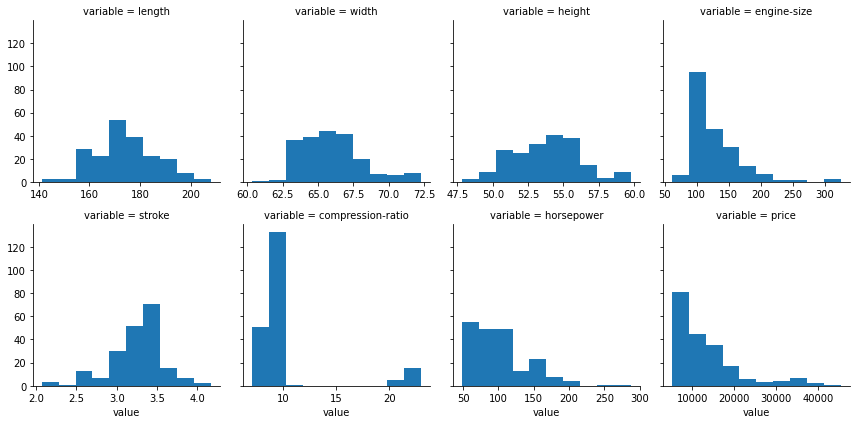

In [ ]:
# VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

long_feat = pd.melt(features,
                  value_vars=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'] )
fg=sns.FacetGrid(long_feat, col="variable", col_wrap=4, sharex=False)
fg=fg.map(plt.hist, "value" )

Let's take a look at the histogram of the transformed data:
(X-Achse verändert sich)

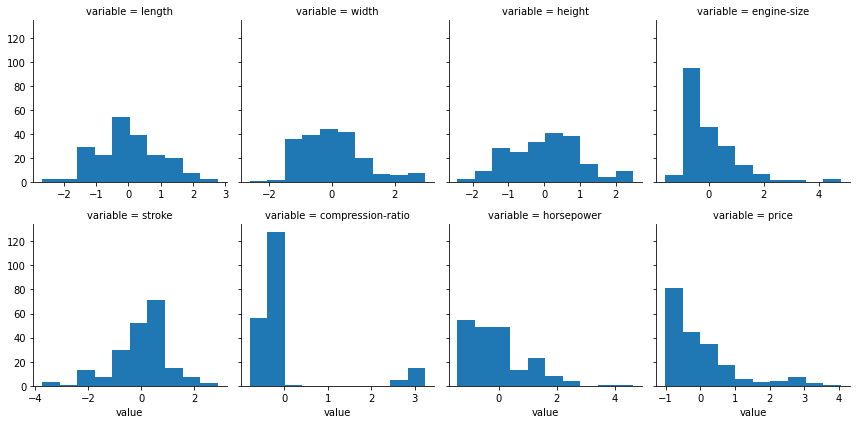

In [ ]:
# VISUALISATION
long_feat_std = pd.melt(features_std,
                  value_vars=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'] )
fg=sns.FacetGrid(long_feat_std, col="variable", col_wrap=4, sharex=False)
fg=fg.map(plt.hist, "value" )

We can see the mean and scale used in the transformation:

In [ ]:
print(std_scaler.mean_)
print(std_scaler.scale_)

[1.74049268e+02 6.59078049e+01 5.37248780e+01 1.26907317e+02
 3.25542289e+00 1.01425366e+01 1.04256158e+02 1.32071294e+04]
[1.23071608e+01 2.13996525e+00 2.43755487e+00 4.15410017e+01
 3.15928617e-01 3.96234058e+00 3.96164294e+01 7.92727287e+03]


#33 - Imputation of missing values

<div align="center"> <h1>Imputation of Missing Values</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

Sometimes datasets are incomplete. For example, the column engine-location has missing values in the following:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import pandas as pd

car_prices=pd.read_csv("car_prices.csv")

features = car_prices
features = features.replace('?', '', regex=False)
features = features.apply(pd.to_numeric, errors='coerce')

In [ ]:
features

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.6,...,130,NaN,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.6,...,130,NaN,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.5,...,152,NaN,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.8,...,109,NaN,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.4,...,136,NaN,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.1,...,141,NaN,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.1,...,141,NaN,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.1,...,173,NaN,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.1,...,145,NaN,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
features.isna().sum()

symboling              0
normalized-losses     41
make                 205
fuel-type            205
aspiration           205
num-of-doors         205
body-style           205
drive-wheels         205
engine-location      205
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
engine-type          205
num-of-cylinders     205
engine-size            0
fuel-system          205
bore                   4
stroke                 4
compression-ratio      0
horsepower             2
peak-rpm               2
city-mpg               0
highway-mpg            0
price                  4
dtype: int64

First, let's remove all columns that are compeltely empty:
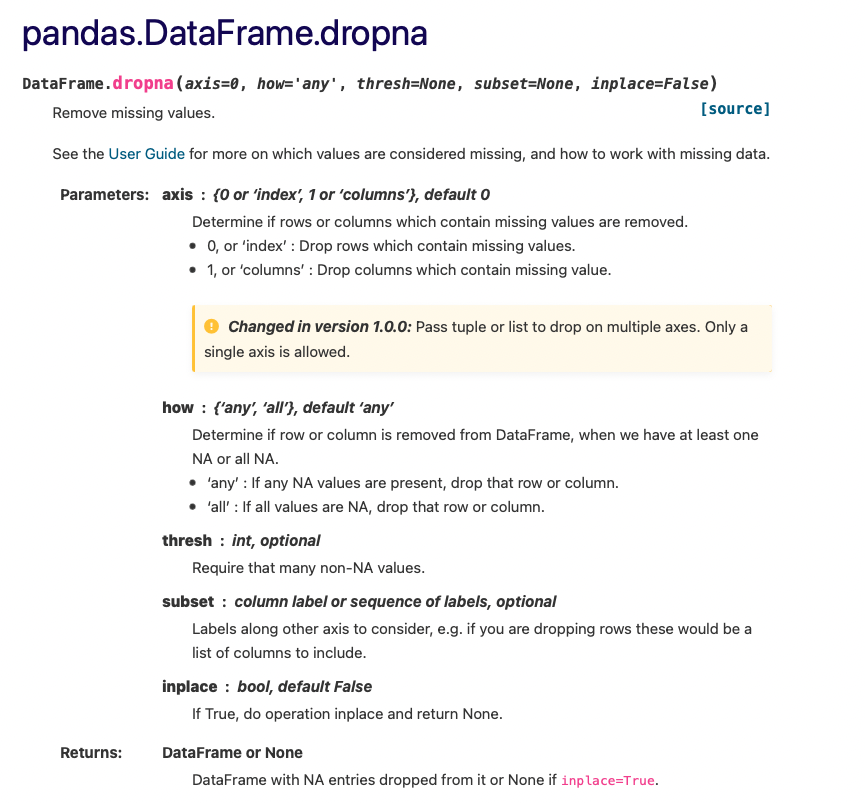

In [ ]:
features = features.dropna(axis='columns', how='all') #droppen jede Spalte, die vollständig leer sind, war aber bei keiner Zeile so, also keine gedropped

In [ ]:
features.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Most algorithms of machine learning and data mining do not accept inputs with missing values. There are several strategies to deal with missing values:

* remove observations that contain missing values
* imputation of missing values

Removing observations with missing values is easy with pandas:

In [ ]:
features_deleted1=features.dropna(axis='index', how='any').describe() # wenn eine Zeile irgendwo fehlende WErte hat: werden gelöscht

In [ ]:
features_deleted1

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.737500,121.300000,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,3.298438,3.237312,10.145125,95.875000,5116.250000,26.506250,32.068750,11427.681250
std,1.189511,35.602417,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,0.267348,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948,5863.789011
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000,7383.500000
50%,1.000000,114.000000,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9164.000000
75%,2.000000,148.000000,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


With this solution we keep only 160 observations. We lost more than 20% of the observations.

Let's try the other approach. We can impute the missing values, inferring them from the rest of the known part of the data. Below, the missing values are replaced by the mean of the known values. The other available strategies are the median and the most frequent value.

Note that observations with missing values in the target feature are useless to 'teach' the model, so we get rid of them first.

We can also consider only specific columns for the drop:

In [ ]:
features.dropna(axis=0, subset=['price']) #statt axis = 0 ginge auch axis='index'

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
features.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # define the imputer object # ersetzen fehlende Werte durch Means der Spalte
features_imp = imputer.fit_transform(features)  # fit to the data and tranform it 
features_imp.shape

(201, 16)

In [ ]:
features_imp

array([[ 3.0000e+00,  1.2200e+02,  8.8600e+01, ...,  2.1000e+01,
         2.7000e+01,  1.3495e+04],
       [ 3.0000e+00,  1.2200e+02,  8.8600e+01, ...,  2.1000e+01,
         2.7000e+01,  1.6500e+04],
       [ 1.0000e+00,  1.2200e+02,  9.4500e+01, ...,  1.9000e+01,
         2.6000e+01,  1.6500e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]])

The output is a numpy array. For an easier visualization we can transform it back to a pandas Dataframe:

In [ ]:
features_df=pd.DataFrame(features_imp, columns=features.columns)
features_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


#34 - Regression

<div align="center"> <h1>Regression</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.set_printoptions(linewidth=800)
np.set_printoptions(edgeitems=20)
pd.set_option('display.width', 700)
pd.options.display.max_colwidth = 100
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
!pip install altair_viewer
import altair as alt
import altair_viewer
alt.data_transformers.disable_max_rows()
alt.renderers.enable('altair_viewer')
alt.renderers.enable('mimetype')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 844 kB 7.6 MB/s 


RendererRegistry.enable('mimetype')

In [ ]:
# We load the data "boston"
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

# We build the data into a DataFrame
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Regression

In [ ]:
# We perform a train-test-split

mytuple = train_test_split(X, y, test_size=0.2, random_state=123)
X_train = mytuple[0]
X_test = mytuple[1]
y_train = mytuple[2]
y_test = mytuple[3]
# is the same as:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
my_tuple_pandas =pd.DataFrame(mytuple)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
my_tuple_pandas

,0
0,"[[0.0351, 95.0, 2.68, 0.0, 0.4161, 7.853, 33.2, 5.118, 4.0, 224.0, 14.7, 392.78, 3.81], [9.72418..."
1,"[[51.1358, 0.0, 18.1, 0.0, 0.597, 5.757, 100.0, 1.413, 24.0, 666.0, 20.2, 2.6, 10.11], [0.05735,..."
2,"[48.5, 17.1, 23.1, 28.4, 18.9, 13.0, 17.2, 24.1, 18.5, 21.8, 13.3, 23.0, 14.1, 23.9, 24.0, 17.2,..."
3,"[15.0, 26.6, 45.4, 20.8, 34.9, 21.9, 28.7, 7.2, 20.0, 32.2, 24.1, 18.5, 13.5, 27.0, 23.1, 18.9, ..."


In [ ]:
# We configure the (unfitted) model (in other words, we configure the algorithm that produces the fitted model - depending on the view):
regr = LinearRegression()

# We fit the model - sometimes one says "we train the model": -> using the training data
regr.fit(X_train, y_train)

# Finally, we evaluate on both - the training data and the test data, which was known during training.
# Take note that the evaluation is generally better for the training data than for the test data, but that the evaluation on the test data is the critical one.
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))
# here we use the R^2 score.

0.7559380876016175
0.6592466510354125


In [ ]:
# Exkurs: Coefficient of determination (Bestimmtheitsmaß oder Determinationskoeffizient) R^2
# https://en.wikipedia.org/wiki/Coefficient_of_determination
# https://de.wikipedia.org/wiki/Bestimmtheitsma%C3%9F
# R = 1 - ( Sum_of_squares_Residuen / Sum_of_squares_Variable ) = 1 - ( ( Sum_of_squares_Residuen / nr_samples ) / Variance_Variable )
# One can interpret this as a comparison of our model with a linear model, which has only one intercept and no coefficients. 
residuen = np.abs(y_test - regr.predict(X_test))
Sum_of_squares_Residuen = np.sum(residuen ** 2)
Sum_of_squares_Variable = np.sum((y_test - np.mean(y_test)) ** 2)
print(1 - Sum_of_squares_Residuen / Sum_of_squares_Variable)

0.6592466510354125


In [ ]:
# That's all very nice, but we build models to get the output for new, completely unseen input data. 
# Of course, completely new data is not available.
y_train_predicted = regr.predict(X_train)
y_test_predicted = regr.predict(X_test)

# Now we use the predicted results to calculate the mean square deviation:
# https://en.wikipedia.org/wiki/Mean_squared_error
# https://de.wikipedia.org/wiki/Mittlere_quadratische_Abweichung
print(np.sum((y_train_predicted - y_train) ** 2) / y_train_predicted.shape[0])
print(np.sum((y_test_predicted - y_test) ** 2) / y_test_predicted.shape[0])

20.677107947815138
28.19248575846932


In [ ]:
#  We can also display coefficients and the intercept:
print(regr.coef_)
print(regr.intercept_)

[-9.87931696e-02  4.75027102e-02  6.69491841e-02  1.26954150e+00 -1.54697747e+01  4.31968412e+00 -9.80167937e-04 -1.36597953e+00  2.84521838e-01 -1.27533606e-02 -9.13487599e-01  7.22553507e-03 -5.43790245e-01]
31.83516412120617


In [ ]:
# Now let's do the whole thing with another model:

regr_gp = GaussianProcessRegressor(alpha=1e-10).fit(X_train, y_train)
regr_gp.predict(X_test)
print(regr_gp.score(X_train, y_train))
print(regr_gp.score(X_test, y_test))

1.0
-6.345678968967632


In [ ]:
# We bring the results into the data frame:
data['PRICE_lin'] = regr.predict(X)
data['PRICE_gp'] = regr_gp.predict(X)
data['row_nr'] = data.index
data_plot = data.melt(id_vars=['row_nr', 'PRICE'],
                      value_vars=['PRICE_lin', 'PRICE_gp']).sort_values('row_nr')

In [ ]:
data_plot

,row_nr,PRICE,variable,value
0,0,24.0,PRICE_lin,29.965569
506,0,24.0,PRICE_gp,24.000000
1,1,21.6,PRICE_lin,25.045095
507,1,21.6,PRICE_gp,21.600000
2,2,34.7,PRICE_lin,31.112143
...,...,...,...,...
503,503,23.9,PRICE_lin,28.268298
1010,504,22.0,PRICE_gp,22.000000
504,504,22.0,PRICE_lin,26.694818
505,505,11.9,PRICE_lin,22.514085


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


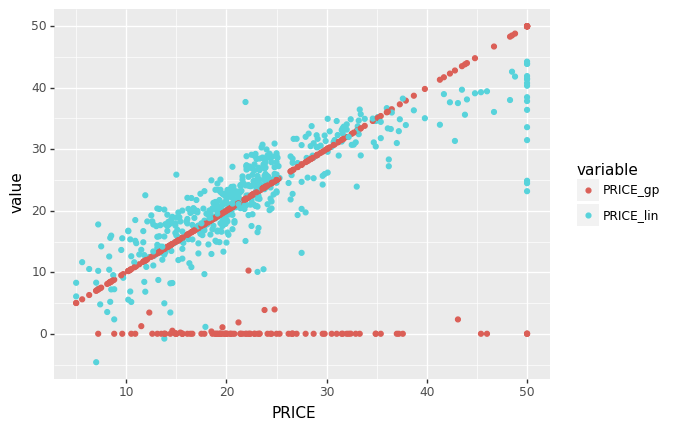

<ggplot: (8772707986121)>

In [ ]:
# VISUALISATION
# Now, we plot this:
import plotnine as pn
pn.ggplot(data_plot, pn.aes(x='PRICE', y='value', color='variable')) + pn.geom_point()


alle Testdaten sind die, die unten auf der 0 Linien sind, ist an Trainingsdaten angepasst aber nicht an Testdaten

In [ ]:
# VISUALISATION # code von den Plots müssen wir nicht können
# install with: pip install altair altair_viewer
(alt.Chart(data_plot).
 properties(height=500, width=500).
 mark_point().
 encode(x='value',
        y='PRICE',
        color='variable')
)

alt.Chart(...)

# Linear Regression - with categorical input data

Let's apply a linear regression model to the data.

Fist we need to split the data in two groups. A training group and a test group.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
car_prices=pd.read_csv("car_prices.csv")

features = (car_prices[['length', 'width', 'height', 'engine-size',  'stroke', 'compression-ratio', 'horsepower', 'price']]
            .replace('?', '', regex=False)
            .apply(pd.to_numeric, errors='coerce'))

features_std = StandardScaler().fit_transform(features)
features_imp = SimpleImputer(strategy='mean').fit_transform(features_std)

X_train, X_test, y_train, y_test = train_test_split(features_imp[:,:-1],
                                                    features_imp[:,-1],
                                                    test_size=0.30, random_state=1)

Train the model:

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

Let's see how good we did using the test group. The method ```score``` calculates the R² value.

In [ ]:
regr.score(X_test, y_test)  # 

0.7811270144233217

Let's visualize the predictions against the real values:

In [ ]:
predictions= regr.predict(X_test)

In [ ]:
# Scale back the data to the original representation using the values used in the transformation
# die WErte sind der Mean und Standard deviation von nicht Skalierten Preis-Daten
predictions_rev=predictions*7.94704014e+03+1.32056900e+04
y_test_rev= y_test*7.94704014e+03+1.32056900e+04

In [ ]:
features.describe()

,length,width,height,engine-size,stroke,compression-ratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000,203.000000,201.000000
mean,174.049268,65.907805,53.724878,126.907317,3.255423,10.142537,104.256158,13207.129353
std,12.337289,2.145204,2.443522,41.642693,0.316717,3.972040,39.714369,7947.066342
min,141.100000,60.300000,47.800000,61.000000,2.070000,7.000000,48.000000,5118.000000
25%,166.300000,64.100000,52.000000,97.000000,3.110000,8.600000,70.000000,7775.000000
50%,173.200000,65.500000,54.100000,120.000000,3.290000,9.000000,95.000000,10295.000000
75%,183.100000,66.900000,55.500000,141.000000,3.410000,9.400000,116.000000,16500.000000
max,208.100000,72.300000,59.800000,326.000000,4.170000,23.000000,288.000000,45400.000000


In [ ]:
predictions

array([-0.91382242, -0.76939783, -0.82955094, -0.91395862, -0.62488613,  1.3717936 , -0.79914424, -1.61022039, -0.82955094, -0.15510312,  0.12720132,  0.20713132,  0.45997396, -0.53358121,  0.27300019,  0.18135255, -0.60843241, -0.93372561,  0.26193241, -0.18102187, -0.1865445 , -1.00221962, -0.25867562, -0.79869517,  0.18135255, -0.93372561,  0.28412909, -0.46248404, -0.98034629, -0.84250046, -0.70303359, -0.15657841,  1.63291519, -0.05835499,  0.70366554, -0.46248404, -0.80385093,  2.23444056, -0.77673185,  0.49457107, -0.57520915,  1.01553602, -0.53544552, -0.2508776 , -0.41251968, -0.78905576,  3.49929785, -0.83394805,  0.40628675,  1.07220458,  1.31982857,  0.07118609,  0.76149181, -0.68517251, -0.2015049 , -0.91395862, -0.21232327, -0.48805227,  0.79368539, -0.70303359, -1.06250733,
       -0.1865445 ])

In [ ]:
features.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

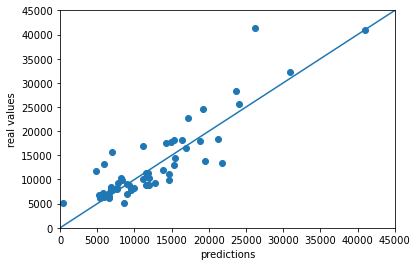

In [ ]:
# VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.scatter(predictions_rev, y_test_rev)
plt.xlabel('predictions')
plt.ylabel('real values')
plt.xlim([0,45000])
plt.ylim([0,45000])
plt.plot([0,45000],[0,45000])

#das sind denk die Y-Werte

## Encoding categorical features

Let's try to add three of the categorical features. Here we include the price so that we are able to exclude observations where 'price' is missing:

In [ ]:
cat_features=car_prices[['fuel-type', 'num-of-doors', 'body-style', 'price']]
cat_features=cat_features.dropna(axis=0, subset=['price'])
cat_features=cat_features.drop('price', axis=1)

In [ ]:
cat_features.head()

,fuel-type,num-of-doors,body-style
0,gas,two,convertible
1,gas,two,convertible
2,gas,two,hatchback
3,gas,four,sedan
4,gas,four,sedan


One simple way to represent categories is to attribute one number to each category. This can however introduce relations between categories that don't exist in reality. Imagine that we map the 'body-style' feature to integers with: 'convertible'=1, 'hatchback'=2 and 'sedan'=3. Now the 'sedan' is bigger than 'hatchback' that is in turn bigger than 'convertible'.

One solution is "One-hot-encoding", which basically is creating new features that represent each category, having a one where that category exists and zero otherwise. There is a *scikit-learn* function to do it but *pandas* has a simpler method:

In [ ]:
ohe_features=pd.get_dummies(cat_features)
ohe_features.head(5)

,fuel-type_diesel,fuel-type_gas,num-of-doors_?,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0,1,0,0,1,1,0,0,0,0
1,0,1,0,0,1,1,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0


Let's append these features to the scaled Dataframe:

In [ ]:
features_df=pd.DataFrame(features_imp,
                         columns=['length', 'width', 'height', 'engine-size', 'stroke', 'compression-ratio', 'horsepower', 'price'])
print(features_df.head())

     length     width    height  engine-size    stroke  compression-ratio  horsepower     price
0 -0.426521 -0.844782 -2.020417     0.074449 -1.821370          -0.288349    0.170228  0.036314
1 -0.426521 -0.844782 -2.020417     0.074449 -1.821370          -0.288349    0.170228  0.415385
2 -0.231513 -0.190566 -0.543527     0.604046  0.679195          -0.288349    1.255637  0.415385
3  0.207256  0.136542  0.235942    -0.431076  0.457626          -0.035973   -0.056950  0.093711
4  0.207256  0.230001  0.235942     0.218885  0.457626          -0.540725    0.271197  0.535224


In [ ]:
ohe_features = ohe_features.reset_index()  # we need to reset the index
features_all = pd.concat([features_df, ohe_features], axis=1)
print (features_all.head())

     length     width    height  engine-size    stroke  compression-ratio  horsepower     price  level_0  index  fuel-type_diesel  fuel-type_gas  num-of-doors_?  num-of-doors_four  num-of-doors_two  body-style_convertible  body-style_hardtop  body-style_hatchback  body-style_sedan  body-style_wagon
0 -0.426521 -0.844782 -2.020417     0.074449 -1.821370          -0.288349    0.170228  0.036314        0      0                 0              1               0                  0                 1                       1                   0                     0                 0                 0
1 -0.426521 -0.844782 -2.020417     0.074449 -1.821370          -0.288349    0.170228  0.415385        1      1                 0              1               0                  0                 1                       1                   0                     0                 0                 0
2 -0.231513 -0.190566 -0.543527     0.604046  0.679195          -0.288349    1.255637  0.415385     

... and create a linear regression model again:

In [ ]:
features_wo_target=features_all.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_wo_target, features_all['price'],
    test_size=0.30, random_state=1)

In [ ]:
regr=LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
regr.score(X_test, y_test) 

0.7870902255861183

The inclusion of these three categorical features reduced the prediction error.

#35 - Overfitting in Regression

<div align="center"> <h1>Overfitting in Regression</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
!pip install altair
import altair as alt
import altair_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [ ]:
alt.data_transformers.disable_max_rows()
pd.set_option('display.width', 700)
pd.options.display.max_colwidth = 100
np.set_printoptions(linewidth=800)
np.set_printoptions(edgeitems=20)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
x_train = np.linspace(1, 100, 10)[:, np.newaxis]
y_train = np.log(x_train)

x_test = np.linspace(1, 100, 1000)[:, np.newaxis]

# We build a linear model...

y_linear = LinearRegression().fit(x_train, y_train).predict(x_test)

# ...and a Gaussian Process Modell with large bandwidth...

kernel = 1.0 * RBF(length_scale=50.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
y_gauss_proc_goodfit = GaussianProcessRegressor(kernel=kernel).fit(x_train, y_train).predict(x_test)

# ...and a Gaussian Process Modell with small bandwidth

y_gauss_proc_overfit = GaussianProcessRegressor().fit(x_train, y_train).predict(x_test)

In [ ]:
x_train

array([[  1.],
       [ 12.],
       [ 23.],
       [ 34.],
       [ 45.],
       [ 56.],
       [ 67.],
       [ 78.],
       [ 89.],
       [100.]])

In [ ]:
# ...and plot the results:

df_plot = pd.DataFrame({'x': np.concatenate((x_train, x_test, x_test, x_test), axis=0).squeeze(),
                        'y': np.concatenate((y_train, y_linear, y_gauss_proc_goodfit, y_gauss_proc_overfit), axis=0).squeeze(),
                        'c': x_train.shape[0] * ['train'] + x_test.shape[0] * ['linear'] + x_test.shape[0] * ['gauss_proc_goodfit'] + x_test.shape[0] * ['gauss_proc_overfit']})

In [ ]:
# VISUALISATION
alt.renderers.enable('default')
alt.Chart(df_plot.query("c == 'train'")). \
 properties(height=500, width=500). \
 mark_point(). \
 encode(x='x',
        y='y',
        color='c') + alt.Chart(df_plot.query("c != 'train'")). \
 properties(height=500, width=500). \
 mark_line(). \
 encode(x='x',
        y='y',
        color='c')

alt.LayerChart(...)

How to do hyperparameter-tuning: https://scikit-learn.org/stable/modules/cross_validation.html

#36 - Classification

<div align="center"> <h1>Classification</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import f1_score, r2_score
import plotnine as pn

In [ ]:
!pip install altair_viewer
import altair as alt

alt.data_transformers.disable_max_rows()
alt.renderers.enable('altair_viewer')
alt.renderers.enable('mimetype')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 844 kB 16.9 MB/s 


RendererRegistry.enable('mimetype')

In [ ]:
# We generate "moons" data
data, label = make_moons(n_samples=(100, 100), noise=0.3, random_state=0)
# data, label weil 2 arrays raus kommen: einer mit data und der mit Labeln (mit 1 und 0 zur Klassifizierung)

In [ ]:
# We make a train-test-split:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
# bei dem train_test split kommt in Klammer dann X, Y, das Y ist hier das Label

In [ ]:
# We configure and fit the model:
classifier = SVC(gamma=2, C=1) #support vector classification
classifier.fit(X_train, y_train)

SVC(C=1, gamma=2)

In [ ]:
# We evaluate the model:
y_test_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))
accuracy2 = np.mean(y_test_pred == y_test)
print('Accuracy: {}'.format(accuracy2))
my_f1_score = f1_score(y_test, y_test_pred)
print('F1-Score: {}'.format(my_f1_score))

Accuracy: 0.8833333333333333
Accuracy: 0.8833333333333333
F1-Score: 0.8571428571428572


In [ ]:
data_df_ueben=pd.DataFrame(np.append(X_train, X_test, axis=0), columns=['x1', 'x2'])
print(data_df_ueben)

           x1        x2
0    1.037021 -0.966259
1    0.831320 -0.352416
2   -0.500154  0.121474
3    1.781137 -0.450004
4    1.716181  0.330868
..        ...       ...
195 -0.794553  0.805474
196 -0.271363  0.262910
197 -1.240677  0.513988
198 -1.188623  0.589199
199  1.798329 -0.416498

[200 rows x 2 columns]


In [ ]:
# We build a DataFrame
data_df = pd.DataFrame(np.append(X_train, X_test, axis=0), columns=['x1', 'x2'])
data_df['train_or_test'] = ['train'] * X_train.shape[0] + ['test'] * X_test.shape[0]
data_df['prediction'] = classifier.predict(np.append(X_train, X_test, axis=0))

In [ ]:
print(data_df)

           x1        x2 train_or_test  prediction
0    1.037021 -0.966259         train           1
1    0.831320 -0.352416         train           1
2   -0.500154  0.121474         train           0
3    1.781137 -0.450004         train           1
4    1.716181  0.330868         train           1
..        ...       ...           ...         ...
195 -0.794553  0.805474          test           0
196 -0.271363  0.262910          test           1
197 -1.240677  0.513988          test           0
198 -1.188623  0.589199          test           0
199  1.798329 -0.416498          test           1

[200 rows x 4 columns]


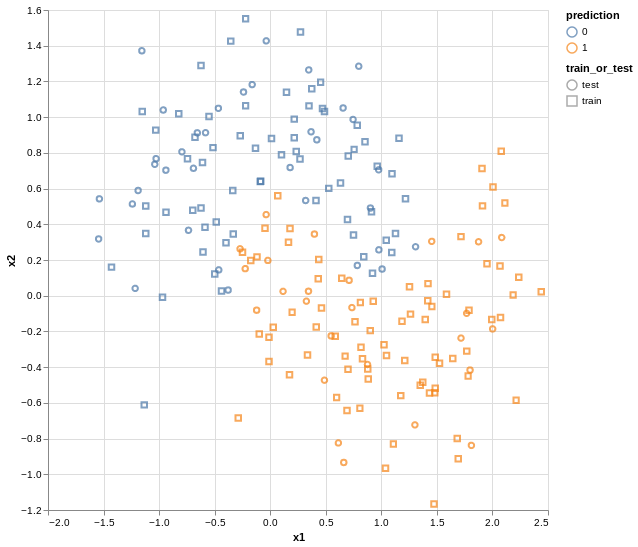

In [ ]:
# ... and plot:
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='prediction:N',
        shape='train_or_test:N')
 ) #.show()

In [ ]:
# np.concatenate([data, label.ndmin(1, -1)], axis=1)
# np.concatenate([data, label.reshape(110, 1)], axis=1)
# np.concatenate([data, label.reshape(label.shape[0], 1)], axis=1)

In [ ]:
# We build a DataFrame
data_train_np = np.concatenate([data, label.reshape(-1, 1)], axis=1)
data_train_df = pd.DataFrame(data_train_np, columns=['x', 'y', 'label'])

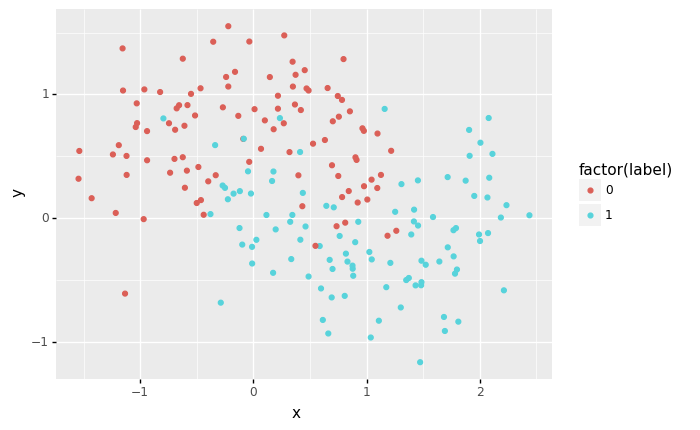

<ggplot: (8756380373640)>


In [ ]:
# ... and plot:
gg1 = pn.ggplot(data=data_train_df, mapping=pn.aes(x='x', y='y', color='factor(label)')) + \
    pn.geom_point()
print(gg1)

In [ ]:
# We predict new labels and build a DataFrame
y_pred = classifier.predict(data)
col = np.array([(j if i else -1) for i, j in zip(list(y_pred == label), list(label))])
 #das zip vereint die Listen so abwechselnd; wenn richtig dann label, wenn falsch dann -1
 # das y_pred erstellt booleans, die Listen werden verglichen und -1 bedeutet dann dass es falsch ist
  data_train_np = np.concatenate([data, col.reshape(-1, 1)], axis=1)
data_train_df = pd.DataFrame(data_train_np, columns=['x', 'y', 'col'])

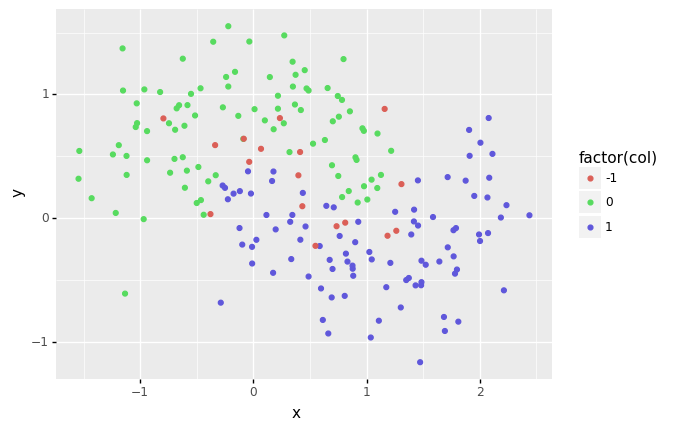

<ggplot: (8756379780813)>


In [ ]:
# ... and plot:
gg2 = pn.ggplot(data=data_train_df, mapping=pn.aes(x='x', y='y', color='factor(col)')) + \
     pn.geom_point()
print(gg2)
#grün und blau ist richtiges label, rot war falsch

More information: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#37 - Clustering

<div align="center"> <h1>Clustering</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [ ]:
from sklearn import cluster
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import plotnine as pn


In [ ]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 5.2 MB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330848 sha256=28946387081e5a3d5ed99898efcfb22215ca72d8f30f08b5bc0db3a88318d9f9
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
!pip install altair_viewer
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('altair_viewer')
alt.renderers.enable('mimetype')

     |████████████████████████████████| 844 kB 5.1 MB/s 


RendererRegistry.enable('mimetype')

In [ ]:
# We generate "moons" data
data, label = make_moons(n_samples=(100, 100), noise=0.1, random_state=0)

# data, label = make_moons(n_samples=200, noise=0.1, random_state=0)  # falls eine alte Version installiert ist

# DBSCAN

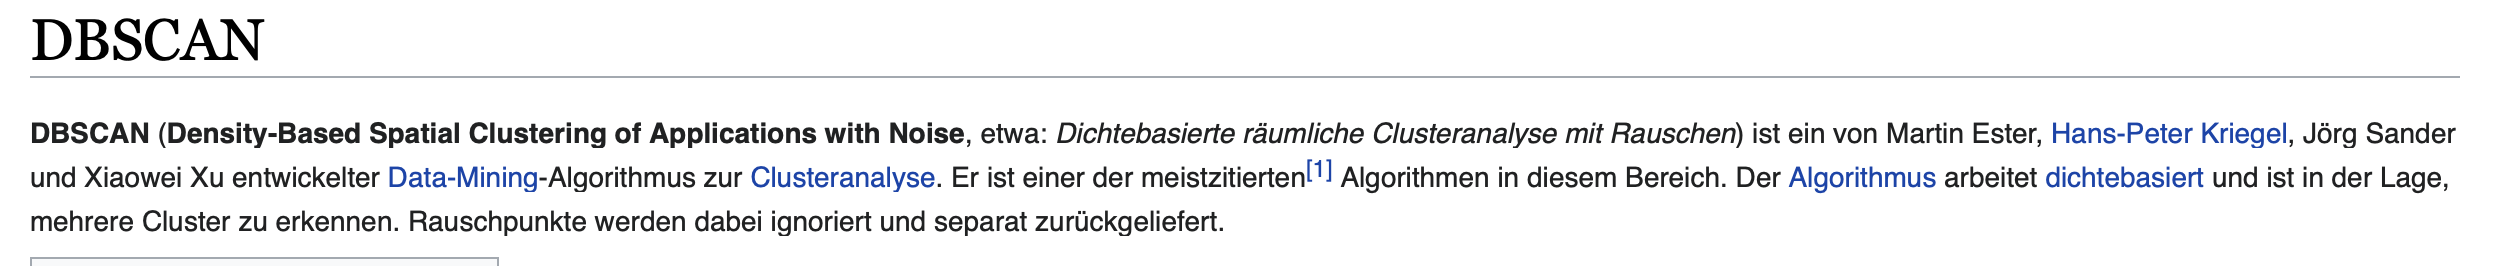

In [ ]:
# We configure and fit the model:
dbscan = cluster.DBSCAN(eps=0.2)
#das eps gibt den Radius an, in welchem geclustert wird, mit min_samples könnte man noch festlegen,
# wie viele in dem Radius sein müssen damit es Core-point ist

# We fit the model: (mit den X Daten der Moon Daten)
dbscan.fit(data)

# We retrieve the labels:
cluster_dbscan = dbscan.labels_ 
#"labels_ndarray of shape (n_samples):
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.""
cluster_dbscan[:5]

array([ 0,  1,  1, -1,  1])

In [ ]:
# or we get fit and retrieve the labels in one step:
cluster_dbscan = dbscan.fit_predict(data)
cluster_dbscan[:5]

array([ 0,  1,  1, -1,  1])

In [ ]:
# We build a DataFame...
data_np = np.concatenate([data, cluster_dbscan.reshape(-1, 1)], axis=1) #reshape weil cluster_dbscan davor in Array ohne Spalten, also keine Matrix
data_df = pd.DataFrame(data_np, columns=['x', 'y', 'cluster_dbscan'])

In [ ]:
print(data_df)

            x         y  cluster_dbscan
0    0.792357  0.502649             0.0
1    1.631583 -0.463897             1.0
2   -0.067109  0.267767             1.0
3   -1.044124 -0.182608            -1.0
4    1.767048 -0.198610             1.0
..        ...       ...             ...
195 -0.545442  0.870811             0.0
196  1.790205  0.209022             1.0
197  0.209487 -0.000785             1.0
198  0.169222  1.018948             0.0
199  1.588191 -0.190821             1.0

[200 rows x 3 columns]


In [ ]:
#alternative zur Lösung
data_df_2=pd.concat([pd.DataFrame(data),pd.DataFrame(cluster_dbscan)],axis=1) #Achtung: Spalten sollen verbunden werden -> "axis = 1"
data_df_2.columns=['x', 'y', 'cluster_dbscan'] #Spalten umbenennen


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


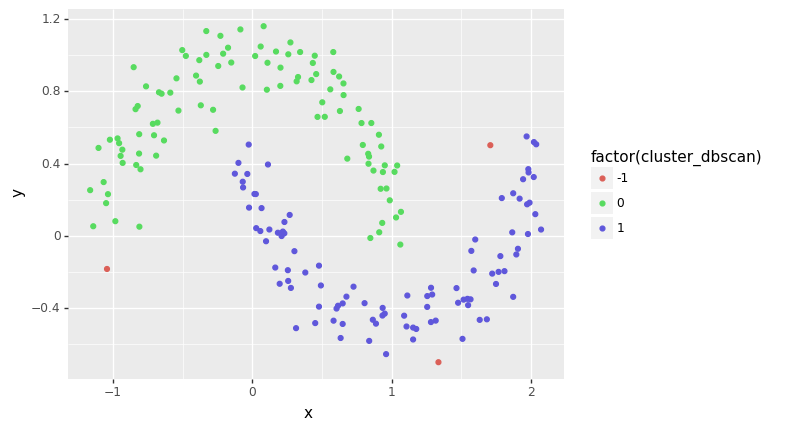

<ggplot: (8784962178921)>


In [ ]:
# and plot:
gg = pn.ggplot(data=data_df, mapping=pn.aes(x='x', y='y', color='factor(cluster_dbscan)')) + \
     pn.geom_point()
print(gg)

In [ ]:
# We build a DataFame...
data_np = np.concatenate([data, label.reshape(-1, 1), cluster_dbscan.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x1', 'x2', 'class', 'cluster'])

In [ ]:
print(data_df)

           x1        x2  class  cluster
0    0.792357  0.502649    0.0      0.0
1    1.631583 -0.463897    1.0      1.0
2   -0.067109  0.267767    1.0      1.0
3   -1.044124 -0.182608    0.0     -1.0
4    1.767048 -0.198610    1.0      1.0
..        ...       ...    ...      ...
195 -0.545442  0.870811    0.0      0.0
196  1.790205  0.209022    1.0      1.0
197  0.209487 -0.000785    1.0      1.0
198  0.169222  1.018948    0.0      0.0
199  1.588191 -0.190821    1.0      1.0

[200 rows x 4 columns]


In [ ]:
# and plot:
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='cluster:N',
        fill='class:N')
) #.show()


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Wie es aussehen sollte:
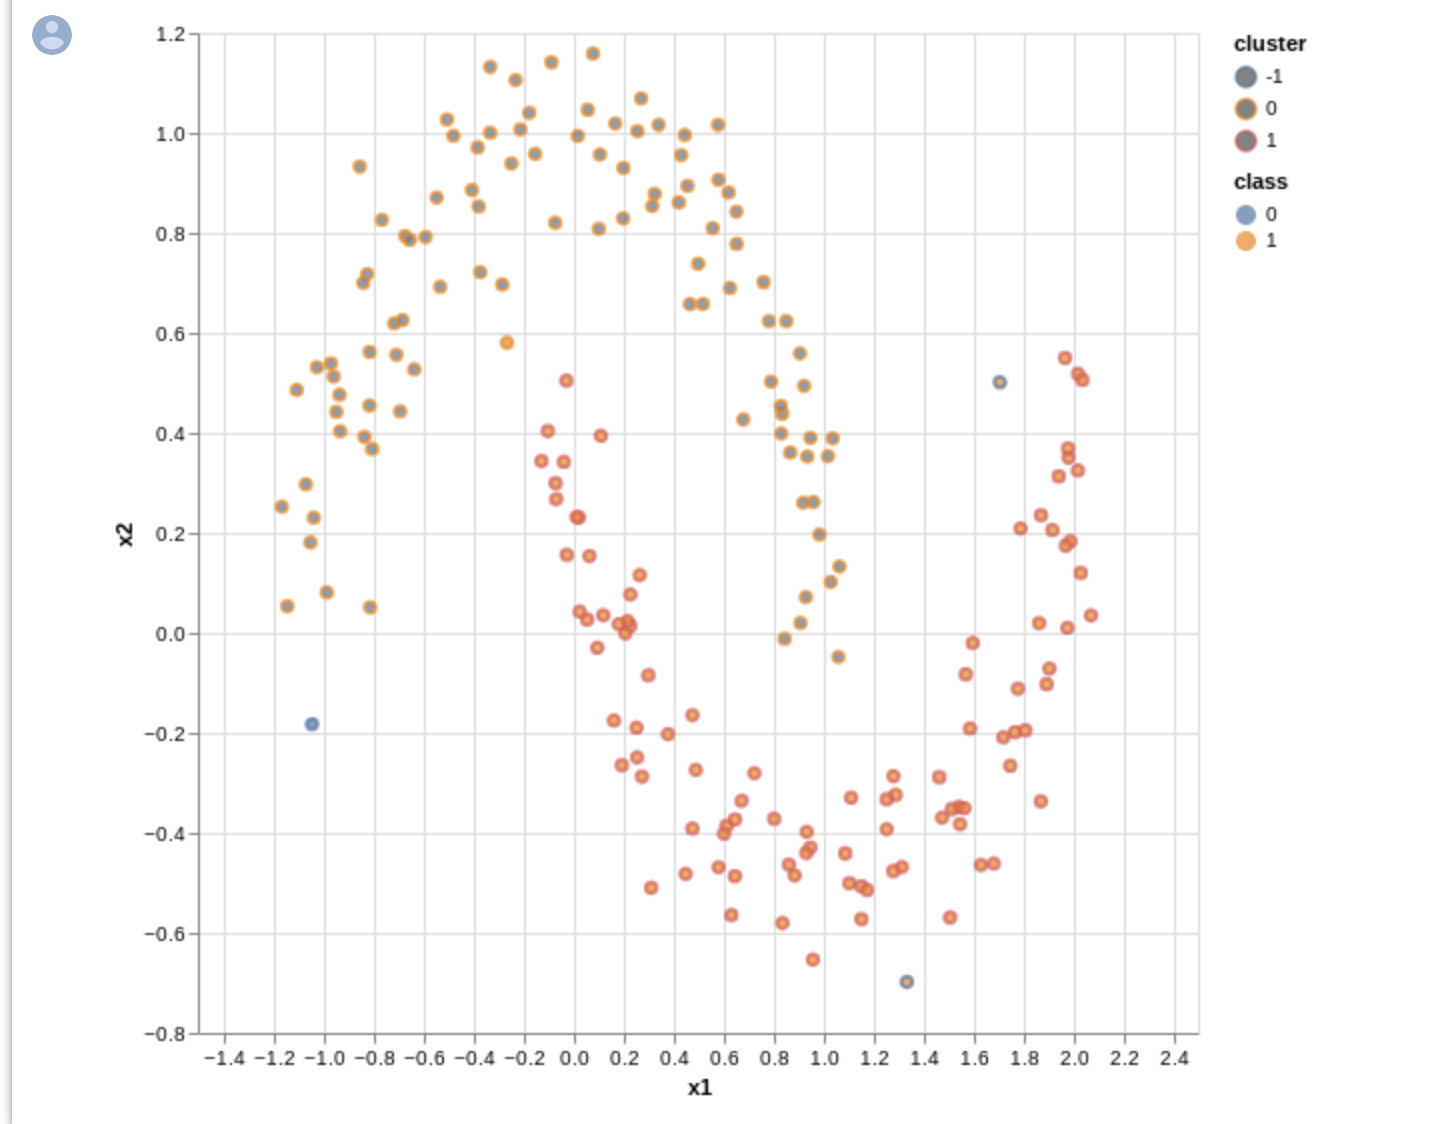

# K-Means

In [ ]:
data, label = make_moons(n_samples=200, noise=0.1, random_state=0)
my_clustering = cluster.KMeans(n_clusters=2) #bei KMeans gibt man an, wie viele Cluster raus kommen sollen
my_clustering.fit(data)
nrs_clusters = my_clustering.labels_ #Python erstellt die Labels

data_np = np.concatenate([data, label.reshape(-1, 1), nrs_clusters.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x1', 'x2', 'class', 'cluster'])

In [ ]:
# VISUALISATION
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='cluster:N',
        fill='class:N')
 ) #.show()

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


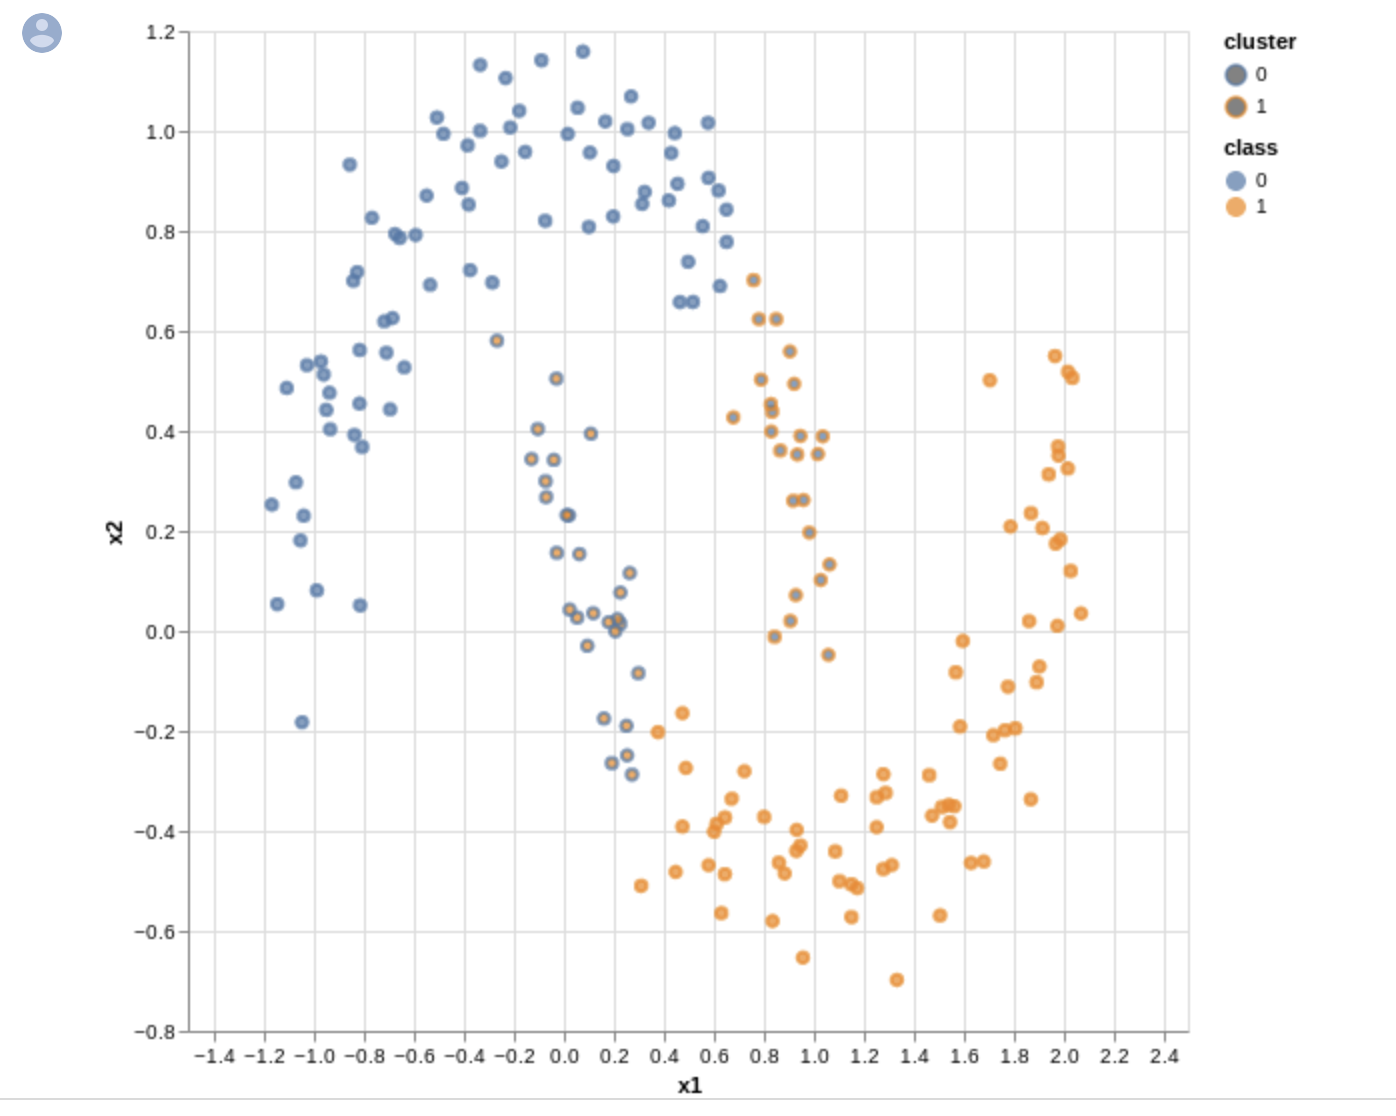

# HDBSCAN

In [ ]:
!pip install hdbscan
import hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 25.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342157 sha256=5683d83aa49ac5c4c2dc949f861ea3337a9182d9ec20b65d4ed9ab31bcb04500
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_hdbscan = clusterer.fit_predict(data)

In [ ]:
data_np = np.concatenate([data, cluster_hdbscan.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x', 'y', 'cluster_hdbscan'])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


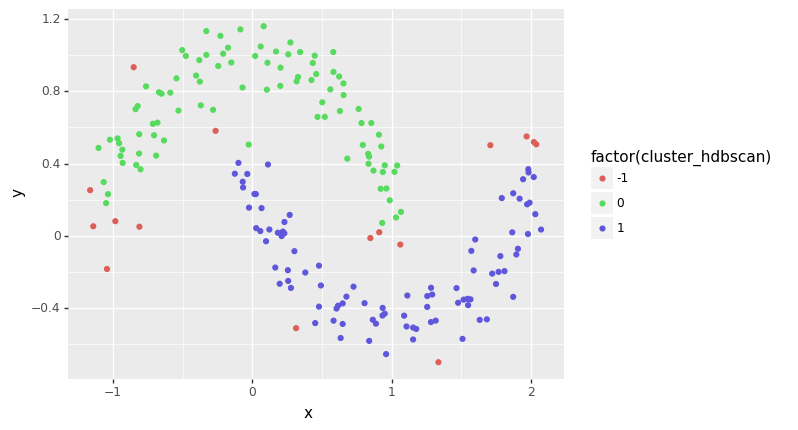

<ggplot: (8784962645377)>


In [ ]:
# VISUALISATION
gg = pn.ggplot(data=data_df, mapping=pn.aes(x='x', y='y', color='factor(cluster_hdbscan)')) + \
     pn.geom_point()
print(gg)

# DBSCAN with noise

In [ ]:
# We repeat everything, but with more noise:

data, label = make_moons(n_samples=200, noise=0.2, random_state=0)
my_clustering = cluster.DBSCAN(eps=0.20)
my_clustering.fit(data)
nrs_clusters = my_clustering.labels_

data_np = np.concatenate([data, label.reshape(-1, 1), nrs_clusters.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x1', 'x2', 'class', 'cluster'])

In [ ]:
# VISUALISATION
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='cluster:N',
        fill='class:N')
 ) #.show()

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


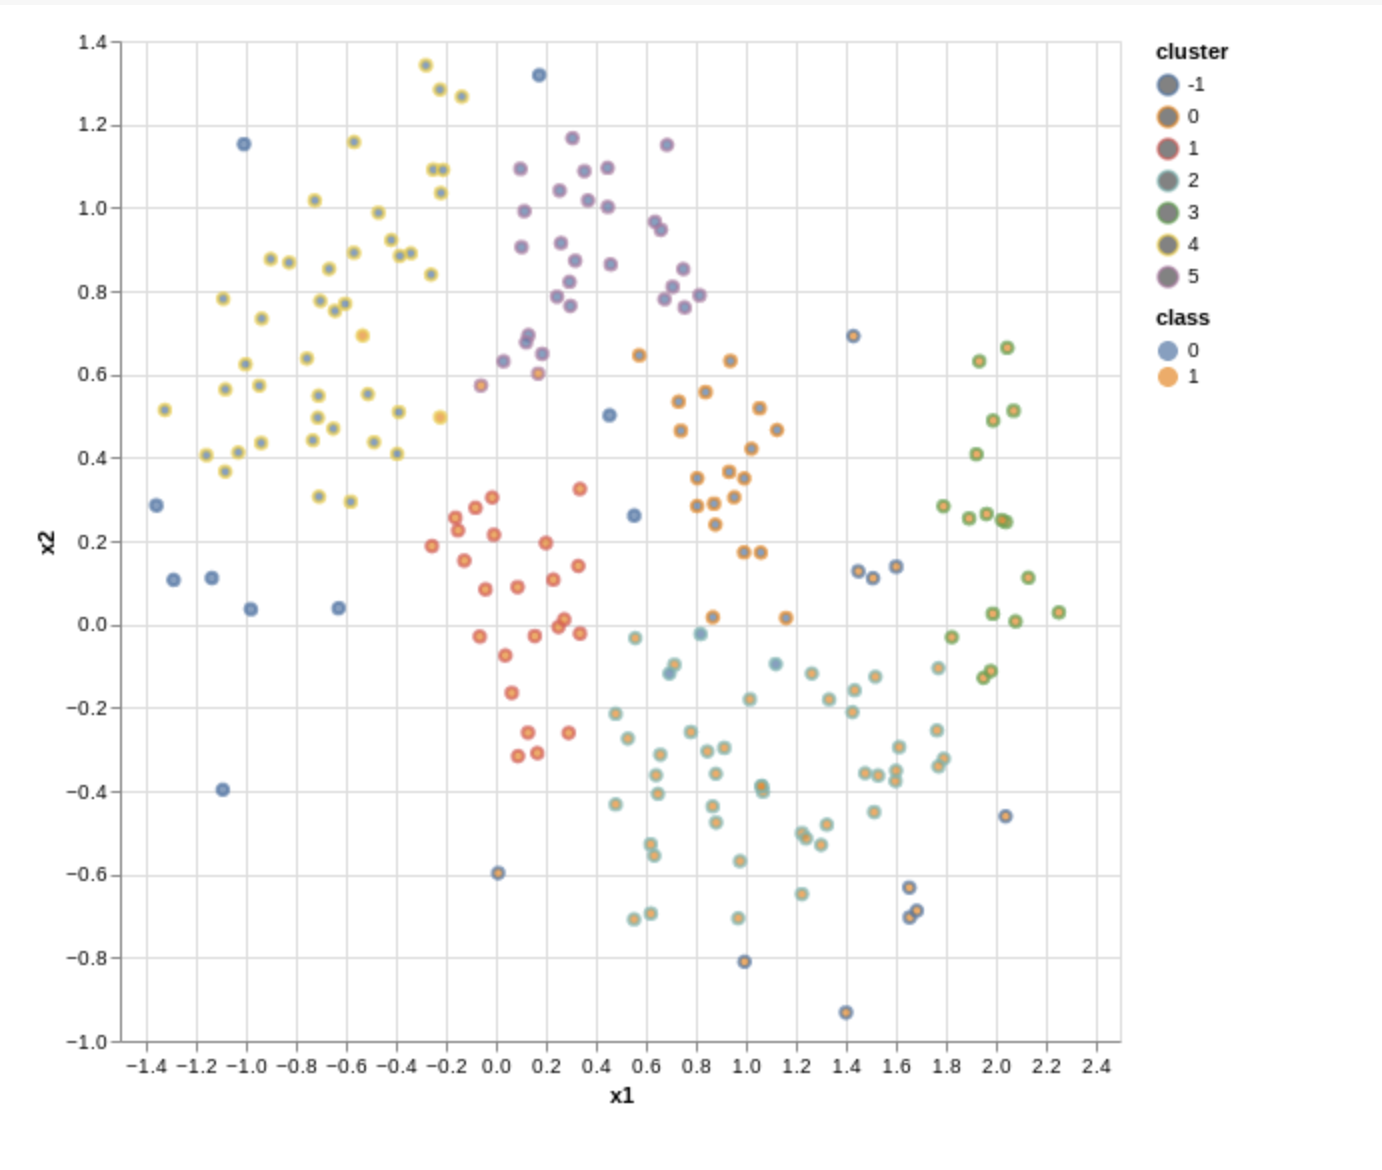

# Using a list for DBSCAN and K-Means

In [ ]:
# Using a list:

results = []
for my_clustering in [cluster.DBSCAN(eps=0.20), cluster.KMeans(n_clusters=2), cluster.KMeans(n_clusters=3), cluster.KMeans(n_clusters=3)]:
    my_clustering.fit(data)
    nrs_clusters = my_clustering.labels_
    results.append(nrs_clusters)